<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of classifier models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Credit Card Fraud Detection

## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# Pandas is a tool for analyzing and manipulating data.
# Numpy is a tool for executing numerous mathematical operations on arrays.
# Seaborn is a similar-functioning program built on top of Matplotlib.
# Matplotlib is a tool for visualizing data.


!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install xgboost


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [8]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Draw the plots for visualization.
Exploratory Data Analysis

<Axes: ylabel='count'>

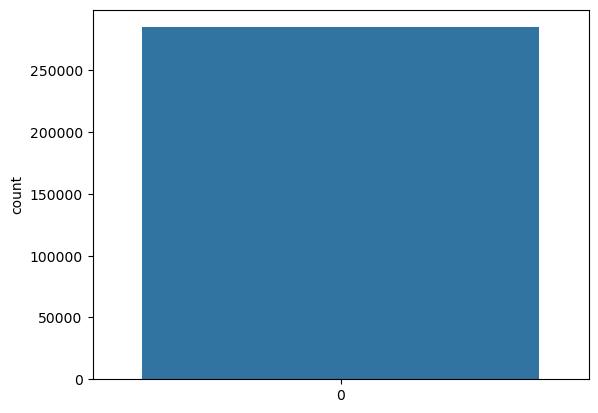

In [42]:
sns.countplot(df['Class'])

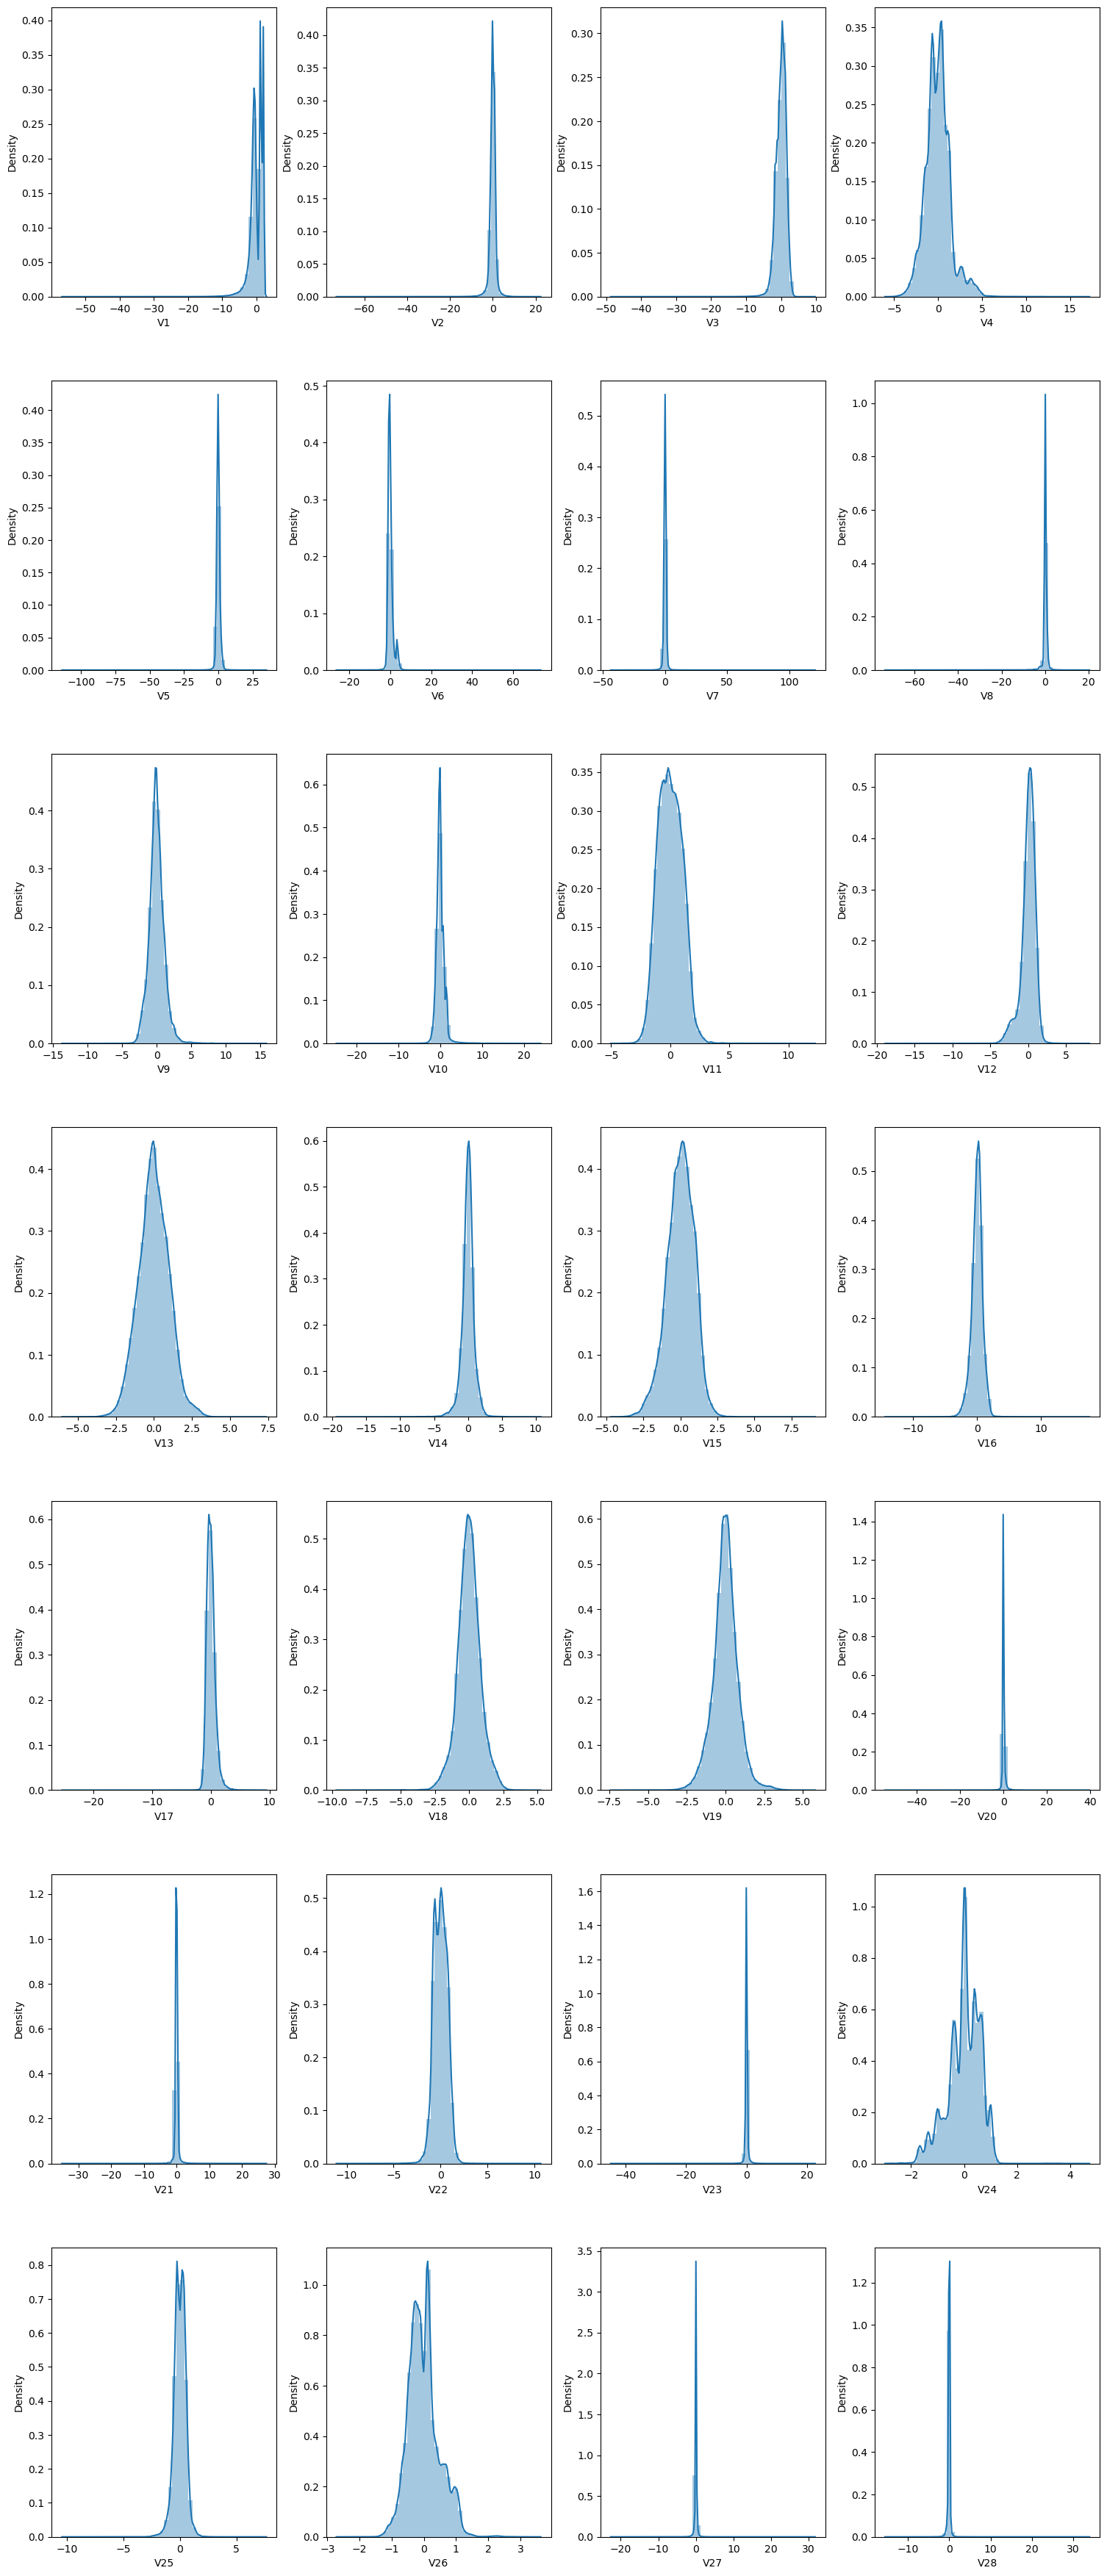

In [46]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(15, 35))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Time', ylabel='Density'>

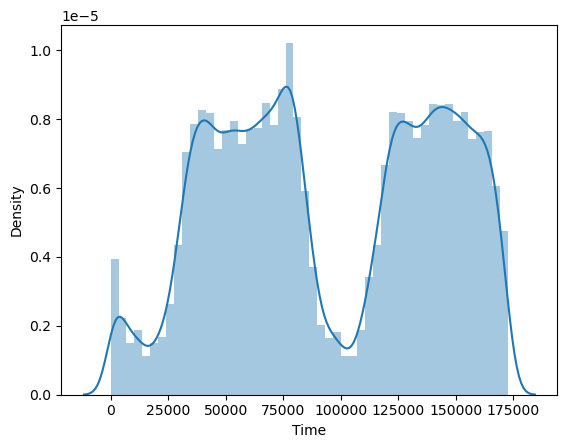

In [34]:
sns.distplot(df['Time'])

<Axes: xlabel='Amount', ylabel='Density'>

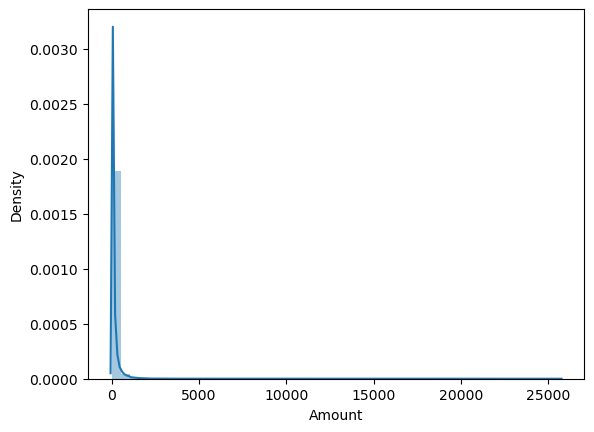

In [44]:
sns.distplot(df['Amount'])

Coorelation Matrix


<Axes: >

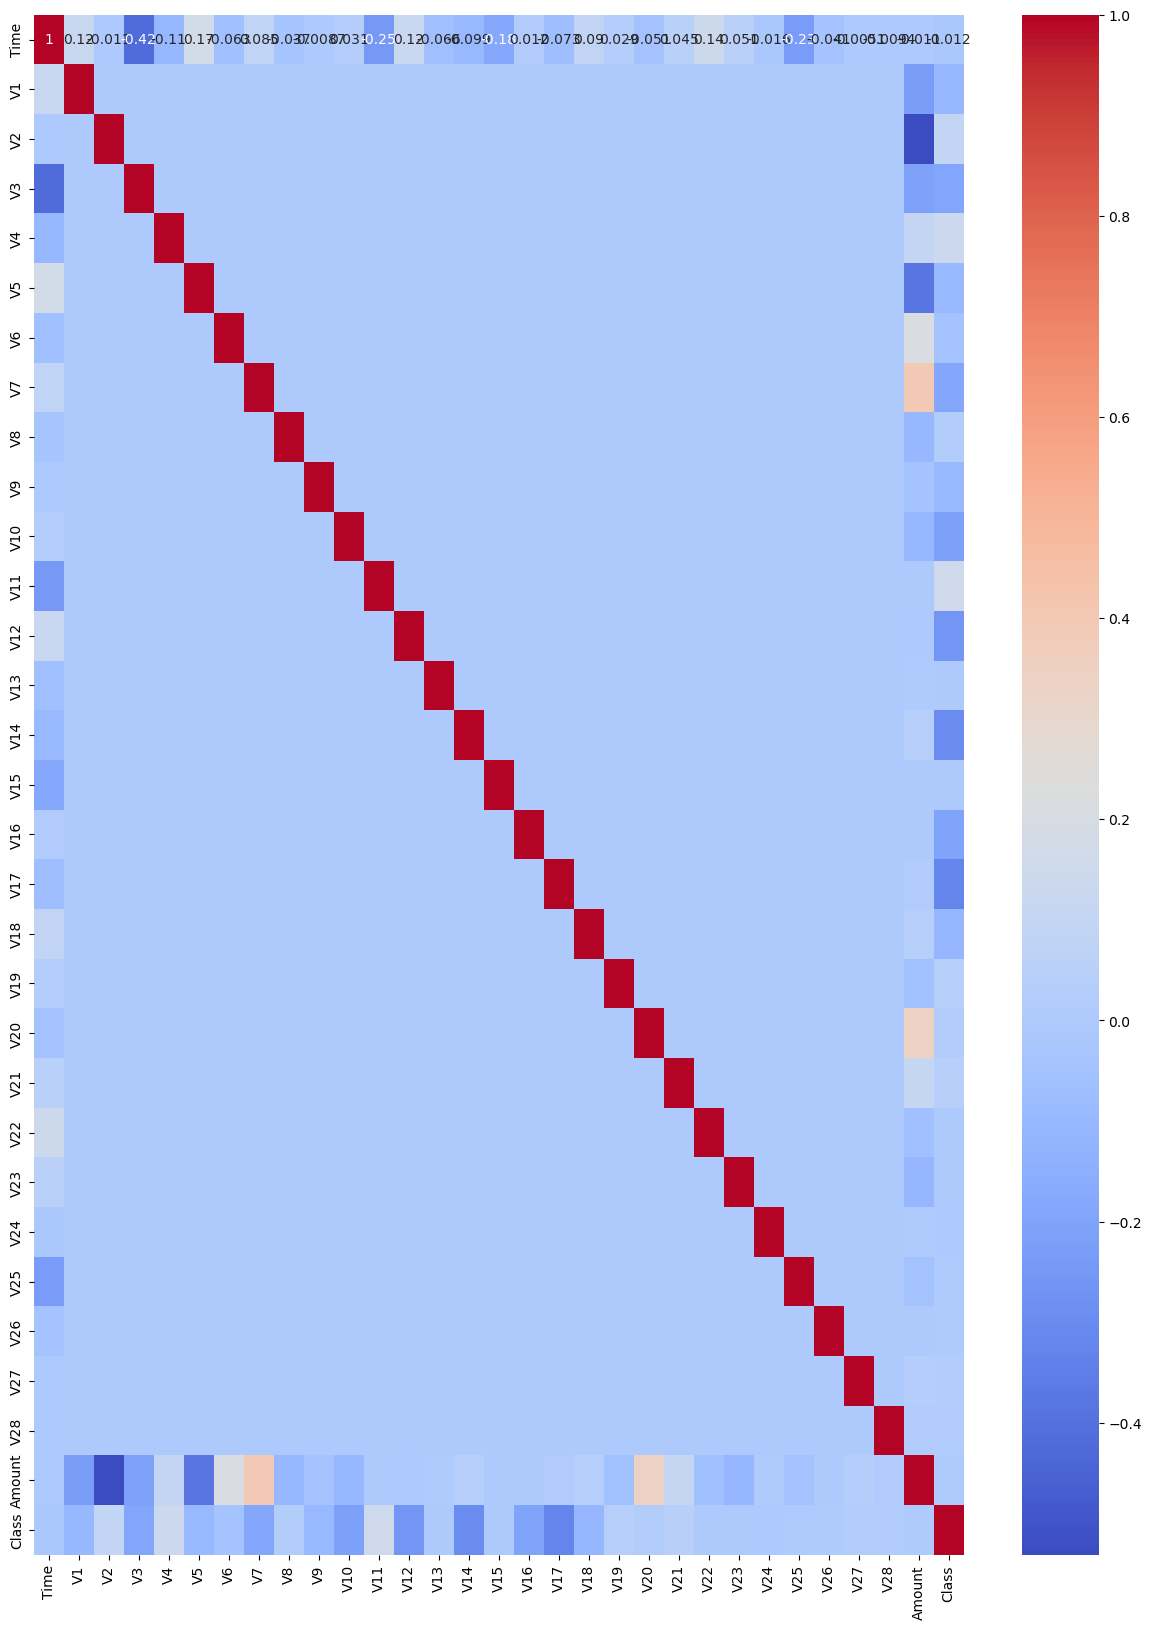

In [60]:
corr = df.corr()
plt.figure(figsize=(15,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# 2. Objectives


The main objective of the Credit Card Fraud Detection project is to utilize machine learning techniques to detect fraud in credit card transactions. The primary goals of such an analysis could include:

1. Fraud Detection: The main aim is to accurately identify whether fraud is present in credit card transactions by building a model to detect fraudulent transactions.

2. Accuracy and Reliabity: It is important for the model to have high levels of accuracy and reliability. Minimizing false positives and false negatives in fraud detection is crucial.

3. Precision and recall: The model should have high precision and recall values in fraud detection. This is important to avoid missing real fraud cases.

4. Cost-effectiveness: The methods used for fraud detection should be cost-effective. Along with high accuracy and reliability, the analysis is expected to be cost-effective.

5. Data Security and Privacy: Credit card transactions contain sensitive data, so maintaining data security and privacy during analyses is critical.


6. Continuous improvement: Continuous improvement and updating of the model are essential to adapt to changing trends in fraud and new fraudulent methods.

Following these objectivese prsoject may test various machine learning techniques for n. To perform Model Training we will use several different models like Logistic Regression, Random Forest, XGBoost.ction process.

# 3. Classification Models


In [61]:
#Input Split

X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [62]:
#Standard Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

x_scaler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

In [63]:
#Splitting the Data:

# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [64]:
#Logistic Regression:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.719626168224299


In [71]:
#Random Forest:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8622222222222222


In [69]:
#XGBoost:

from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8622222222222222


## The Model That Best Suits: 

Based on the dataset, the XGBoost model appears to be the best fit for the credit card fraud detection classification problem among the models tested.

While Logistic Regression is a simple and interpretable model, it doesn't seem to perform well in this case due to the complex nature of credit card fraud detection. Its F1 score of around 72% indicates a moderate performance.

Random Forest is a powerful ensemble method that generally performs well in a variety of tasks. However, due to the unbalanced nature of the data, its performance may be affected. While the F1 score improved compared to Logistic Regression, it might still be suboptimal.

XGBoost is a boosting algorithm known for its high performance and scalability. In this case, it outperforms the other models with an F1 score of 86%, indicating better precision and recall. It handles unbalanced data well and provides robust results.


# 4. Insights and key findings


Unbalanced Data Impact: The unbalanced nature of the dataset affects the performance of traditional models like Logistic Regression and Random Forest. They struggle to capture the minority class effectively.

XGBoost Performance: XGBoost demonstrates superior performance compared to other models tested. It handles the imbalance issue better and provides a higher F1 score, indicating better fraud detection capabilities.

Model Evaluation: The F1 score is used as the primary evaluation metric due to its balance between precision and recall, which is important for this classification problem where both types of errors (false positives and false negatives) are critical.

Scalability: Although Random Forest had a longer runtime due to its larger number of dataset values, XGBoost's performance remains competitive while being more scalable, making it a practical choice for real-world applications where efficiency is crucial.

In conclusion, XGBoost emerges as the best-fit model for credit card fraud detection, offering a balance between accuracy, efficiency, and scalability. Further fine-tuning of hyperparameters and exploring advanced techniques like ensemble methods could potentially enhance its performance even further.


# 5. Next Steps


While XGBoost has demonstrated strong performance in the initial analysis, there are still potential flaws in the model and areas for improvement. Here are some possible flaws and a plan of action to revisit the analysis: 

1. Imbalanced Data Handling: Explore oversampling techniques like SMOTE or using different sampling strategies to address class imbalance.

2. Feature Engineering: Utilize techniques such as PCA or feature selection algorithms like Recursive Feature Elimination to enhance the model's performance by selecting or creating more relevant features. 

3. Hyperparameter Tuning: Optimize XGBoost's hyperparameters using techniques like grid search or random search to further improve its performance. 

4. Model Interpretability: Incorporate techniques like SHAP values or LIME to gain insights into how the model makes predictions and improve its interpretabili tC. 

5. Cross-Validation: Implement cross-validation to evaluate the model's generalization performance and reduce the risk of overfitt ing. Ensemble Methods: Explore different ensemble techniques or combine multiple models to enhance predictive performance and robustness. robustness.



## Plan of Action:

1.	Data Collection: Gather additional data if available, especially fraudulent transactions, to improve the model's ability to generalize to unseen data.

2.	Data Preprocessing: Revisit the data preprocessing steps to ensure that they are appropriately handling missing values, outliers, and scaling of features.

3.	Feature Engineering: Experiment with different feature engineering techniques to extract more relevant information from the data and improve model performance.

4.	Model Evaluation: Revisit the evaluation metrics and techniques used to assess model performance, considering additional metrics like AUC-ROC (Area Under the Receiver Operating Characteristic Curve) or precision-recall curves.

5.	Benchmarking: Compare the performance of XGBoost with other advanced machine learning algorithms or deep learning models to identify the most suitable approach for the problem.

6.	Iterative Improvement: Treat the analysis as an iterative process, continuously refining the model based on feedback from evaluation metrics and domain By addressing these potential flaws and following the proposed action plan, we can revisit the analysis with a more robust and effective approach and ultimately improve the credit card fraud detection model. tection model.

## Balancing the classes using SMOTE 

In [ ]:

#In this section, we balanced the class with equal distribution and train them with similar models.
# At first there was a significant difference between 0 and 1, here we are trying to equalize it. 

from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)



from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
#F1 Score: 0.11202466598150052


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
#F1 Score: 0.832618025751073


from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
F1 Score: 0.7924528301886793


With the XGB Classifier, we are getting good results even without class balancing.
XGBoost is the model that performs the best out of the three that we have used.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
